# Project 5: 

In [105]:
import numpy as np
import matplotlib.pyplot as plt

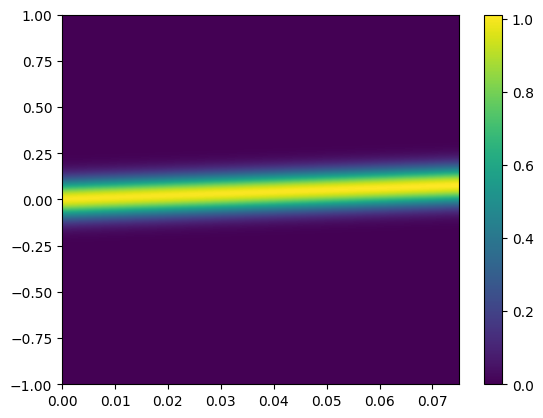

In [106]:
import numpy as np

Nx = 1000
Nt = 50

x0 = 0
w = 0.1
v = 1

xi = np.linspace(-1,1,Nx)
uij = np.zeros((Nx,Nt))

u0 = np.cos(50*xi*np.pi)

dx = (xi[-1]-xi[0])/Nx
dt = 0.0015

a = (v*dt)/(2*dx)

uij[:,0] = 1*np.exp(-(xi-x0)**2/w**2)

for j in range(0, Nt-1):
    for i in range(1, Nx-1):
       uij[i, j+1] = -a*uij[i+1, j] + uij[i, j] + a*uij[i-1, j]

p1 = plt.imshow(uij, aspect = 'auto', origin = 'lower', extent = [0, dt*Nt, xi[0], xi[-1]])
plt.colorbar(p1)

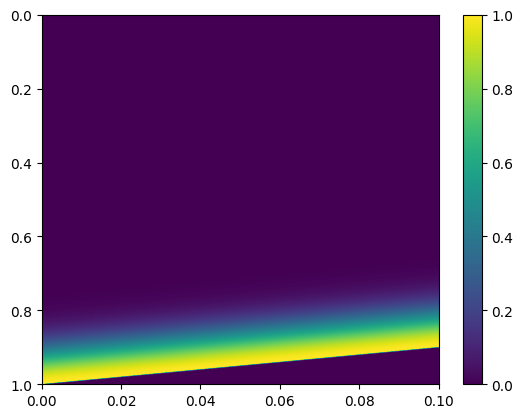

In [107]:
import numpy as np

# Parameters
L = 1         # length of the domain
T = 0.1       # total time
Nx = 1000     # number of spatial points
Nt = 100      # number of time steps
a = 1         # advection speed
dx = L / Nx   # spatial step size
dt = T / Nt   # time step size

# Discretize the spatial domain
x = np.linspace(0, L, Nx)

# Initial condition
xi = np.exp(-((x-x0)**2)/w**2)

# Time-stepping loop
u = np.zeros((Nx, Nt))
u[:,0] = xi
for n in range(0, Nt-1):
    for i in range(1, Nx-1):
        u[i, n+1] = 0.5 * (u[i+1,n] + u[i-1,n]) - 0.5 * a * dt / dx * (u[i+1,n] - u[i-1,n])

p1 = plt.imshow(u, aspect = 'auto', origin = 'lower', extent = [0, dt*Nt, xi[0], xi[-1]])
plt.colorbar(p1)
     